## Observations and Insights 

1. Ramicane and Capmoline are the most effective drugs in reducing tumor growth.  They also have the highest number of trials in this animal study. 
2. In this study, the distribution of female and male mice is almost equal. For a mouse treated with Capomulin, the tumor volume effectively decreases as the timepoint grows. 
3. The correlation coefficient between mouse weight and tumor volume is 0.84, indicating that there is a stong trend towards an increase in the tumor volume as the mouse weight increases.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
mouse_combined_df=pd.merge(mouse_metadata,study_results,on="Mouse ID")
mouse_combined_df=mouse_combined_df.rename(columns={"Age_months":"Age (months)"}) # Renaming "Age_months" column

# Display the data table for preview
mouse_combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age (months),Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_number=mouse_combined_df["Mouse ID"].nunique()
print(f"The number of mice is {mouse_number}.")

The number of mice is 249.


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_data=mouse_combined_df.groupby(["Mouse ID"])["Timepoint"].value_counts()
duplicated_data_df=pd.DataFrame(duplicated_data)
duplicated_data_df.loc[duplicated_data_df["Timepoint"]>1]

Timepoint
Mouse ID Timepoint           
g989     0                  2
         5                  2
         10                 2
         15                 2
         20                 2

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse=mouse_combined_df.loc[mouse_combined_df["Mouse ID"]=="g989"]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age (months),Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=mouse_combined_df.drop_duplicates(["Mouse ID","Timepoint"],keep="first")
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age (months),Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_number=clean_df["Mouse ID"].nunique()
print(f"The number of mice in the clean DataFrame is {mice_number}.")

The number of mice in the clean DataFrame is 249.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
mean_df=clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_df=clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
variance_df=clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
std_dev_df=clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sem_df=clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

pd.DataFrame({"mean":mean_df,"median":median_df,
    "var":variance_df,"std":std_dev_df,
    "sem":sem_df})

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# NumPy library is used
drug_list=sorted(clean_df["Drug Regimen"].unique())
numpy_mean=[]
numpy_median=[]
numpy_var=[]
numpy_std=[]
scipy_sem=[]

for drug in drug_list:
    specific_drug=clean_df.loc[clean_df["Drug Regimen"]==drug]
    numpy_mean.append(np.mean(specific_drug["Tumor Volume (mm3)"]))
    numpy_median.append(np.median(specific_drug["Tumor Volume (mm3)"]))
    numpy_var.append(np.var(specific_drug["Tumor Volume (mm3)"],ddof=1))
    numpy_std.append(np.std(specific_drug["Tumor Volume (mm3)"],ddof=1))
    scipy_sem.append(st.sem(specific_drug["Tumor Volume (mm3)"],ddof=1))

statistics_summary_df=pd.DataFrame({
    "mean":numpy_mean,
    "median":numpy_median,
    "var":numpy_var,
    "std":numpy_std,
    "sem":scipy_sem
})
statistics_summary_df.set_index([drug_list])

,mean,median,var,std,sem
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

Text(0, 0.5, 'Total number of mice')

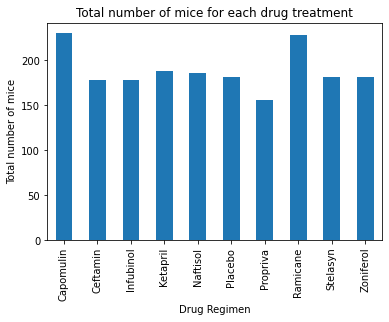

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_per_treatment=clean_df.groupby(["Drug Regimen"])["Mouse ID"].count()
fig=mice_per_treatment.plot(kind="bar", title="Total number of mice for each drug treatment")
fig.set_xlabel("Drug Regimen")
fig.set_ylabel("Total number of mice")

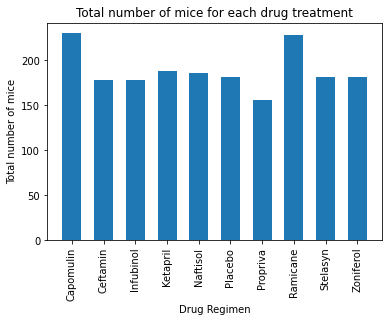

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
labels=sorted(clean_df["Drug Regimen"].unique())
y_value=clean_df.groupby(["Drug Regimen"])["Mouse ID"].count()
plt.xticks(rotation=90)
plt.bar(labels,y_value, width=0.6)

plt.title("Total number of mice for each drug treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Total number of mice")
plt.show()

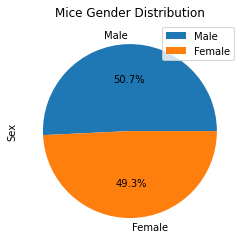

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_distribution=clean_df["Sex"].value_counts()
gender_distribution_df=pd.DataFrame(gender_distribution)
graph=gender_distribution_df.plot(kind="pie",y="Sex",\
    title="Mice Gender Distribution",autopct="%1.1f%%")
graph.patch.set_facecolor('xkcd:mint green')

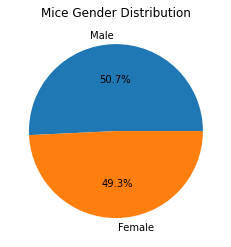

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_distribution,autopct="%1.1f%%",labels=["Male","Female"])
plt.title("Mice Gender Distribution")
plt.show()



## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
four_treatments_df=clean_df.loc[
    (clean_df["Drug Regimen"]=="Capomulin")|(clean_df["Drug Regimen"]=="Ramicane")|
    (clean_df["Drug Regimen"]=="Infubinol")|(clean_df["Drug Regimen"]=="Ceftamin")
]

grouped_four_treatments_df=four_treatments_df.groupby(["Mouse ID","Drug Regimen"])["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_group=pd.merge(clean_df,grouped_four_treatments_df,on="Mouse ID",how="inner",suffixes=("_clean","_grouped"))
last_timepoint_tumor_volume=merged_group.loc[merged_group["Timepoint_clean"]==merged_group["Timepoint_grouped"]]
last_timepoint_tumor_volume=last_timepoint_tumor_volume[["Mouse ID","Drug Regimen","Timepoint_grouped","Tumor Volume (mm3)"]].sort_values("Drug Regimen")
last_timepoint_tumor_volume

,Mouse ID,Drug Regimen,Timepoint_grouped,Tumor Volume (mm3)
317,j246,Capomulin,35,38.753265
350,v923,Capomulin,45,40.658124
340,w150,Capomulin,10,39.952347
337,j119,Capomulin,45,38.125164
380,l509,Capomulin,45,41.483008
...,...,...,...,...
447,r921,Ramicane,30,43.419381
449,w678,Ramicane,5,43.166373
453,y449,Ramicane,15,44.183451
234,r811,Ramicane,45,37.225650


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list=last_timepoint_tumor_volume["Drug Regimen"].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:


    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume=last_timepoint_tumor_volume.loc[last_timepoint_tumor_volume["Drug Regimen"]==drug]\
        ["Tumor Volume (mm3)"]

    # add subset 
    tumor_volume_list.append(tumor_volume)
    
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outlier_occupancy = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]

    if outlier_occupancy.empty==False:
        print(f"The outlier for drug {drug} is {outlier_occupancy}.")

The outlier for drug Infubinol is 526    36.321346
Name: Tumor Volume (mm3), dtype: float64.


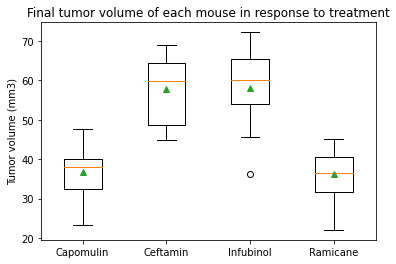

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_volume_list, labels=treatment_list,showmeans=True)
plt.title("Final tumor volume of each mouse in response to treatment")
plt.ylabel("Tumor volume (mm3)")
plt.show()

## Line and Scatter Plots

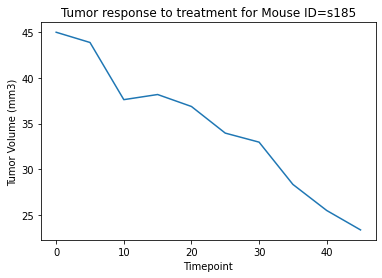

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_data_mouses185=clean_df.loc[(clean_df["Drug Regimen"]=="Capomulin")&(clean_df["Mouse ID"]=="s185")]

x_value=capomulin_data_mouses185["Timepoint"]
y_value=capomulin_data_mouses185["Tumor Volume (mm3)"]
plt.plot(x_value,y_value)
plt.title("Tumor response to treatment for Mouse ID=s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


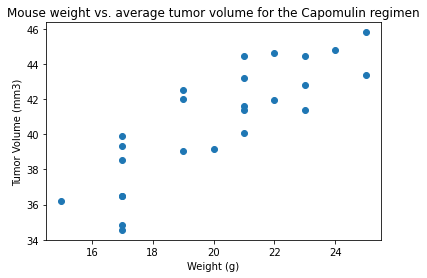

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_data=clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"]
capomulin_mouse_weight=capomulin_data.groupby(["Mouse ID"])["Weight (g)"].mean()
capomulin_mouse_tumor_volume=capomulin_data.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()

capomulin_df=pd.DataFrame({
    "Weight (g)":capomulin_mouse_weight,
    "Tumor Volume (mm3)":capomulin_mouse_tumor_volume
    })

plt.scatter(capomulin_mouse_weight,capomulin_mouse_tumor_volume)
plt.title("Mouse weight vs. average tumor volume for the Capomulin regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation coefficient between mouse weight and tumor volume is: 0.84


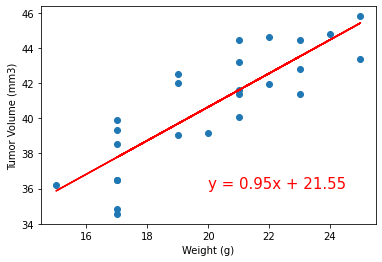

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = capomulin_mouse_weight
y_values = capomulin_mouse_tumor_volume
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The correlation coefficient between mouse weight and tumor volume is: {round(rvalue,2)}")
plt.show()